In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:\0_Respaldo\0_Proyectos_2024\Diabetes alert\dataset\Diabetes Classification.csv', index_col=None)

In [4]:
df.sample(3)

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
2393,2393,41,M,23,5.19,1.99,1.30,2.94,67.2,4.20,0
4440,4440,53,F,23,4.92,1.47,1.05,2.93,54.0,3.39,1
508,508,55,M,28,4.90,2.10,1.10,2.50,56.0,4.40,1


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,F,24,4.20,0.90,2.40,1.40,46.0,4.70,0
1,26,M,23,3.70,1.40,1.10,2.10,62.0,4.50,0
2,33,M,21,4.90,1.00,0.80,2.00,46.0,7.10,0
3,45,F,21,2.90,1.00,1.00,1.50,24.0,2.30,0
4,50,F,24,3.60,1.30,0.90,2.10,50.0,2.00,0
...,...,...,...,...,...,...,...,...,...,...
5127,54,M,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,50,F,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,67,M,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,60,F,29,5.91,1.29,1.73,2.85,50.2,7.33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        5132 non-null   int64  
 1   Gender     5132 non-null   object 
 2   BMI        5132 non-null   int64  
 3   Chol       5132 non-null   float64
 4   TG         5132 non-null   float64
 5   HDL        5132 non-null   float64
 6   LDL        5132 non-null   float64
 7   Cr         5132 non-null   float64
 8   BUN        5132 non-null   float64
 9   Diagnosis  5132 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 401.1+ KB


In [8]:
df.describe()

,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
count,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000
mean,48.950312,24.613406,4.866882,1.719328,1.593305,2.914121,71.144800,4.896969,0.388348
std,14.048794,4.277205,1.001052,1.327057,1.038849,0.945423,28.494394,1.689206,0.487422
min,20.000000,15.000000,0.000000,0.000000,0.000000,0.300000,4.860753,0.500000,0.000000
25%,36.000000,22.000000,4.190000,0.910000,1.090000,2.290000,58.000000,3.900000,0.000000
50%,49.000000,24.000000,4.800000,1.380000,1.300000,2.790000,70.200000,4.720000,0.000000
75%,59.000000,27.000000,5.460000,2.100000,1.590000,3.400000,81.600000,5.600000,1.000000
max,93.000000,47.000000,11.650000,32.640000,9.900000,9.900000,800.000000,38.900000,1.000000


### Convierto la columna 'genre' (categorica a discreta)

In [9]:
# Hago el mapeado de las etiquetas.
gender_mapping = {'M': 0, 'F': 1,'f':1}
df['Gender'] = df['Gender'].replace(gender_mapping).infer_objects()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17124\1880109375.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(gender_mapping).infer_objects()


In [10]:
df

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,1,24,4.20,0.90,2.40,1.40,46.0,4.70,0
1,26,0,23,3.70,1.40,1.10,2.10,62.0,4.50,0
2,33,0,21,4.90,1.00,0.80,2.00,46.0,7.10,0
3,45,1,21,2.90,1.00,1.00,1.50,24.0,2.30,0
4,50,1,24,3.60,1.30,0.90,2.10,50.0,2.00,0
...,...,...,...,...,...,...,...,...,...,...
5127,54,0,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,50,1,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,67,0,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,60,1,29,5.91,1.29,1.73,2.85,50.2,7.33,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        5132 non-null   int64  
 1   Gender     5132 non-null   int64  
 2   BMI        5132 non-null   int64  
 3   Chol       5132 non-null   float64
 4   TG         5132 non-null   float64
 5   HDL        5132 non-null   float64
 6   LDL        5132 non-null   float64
 7   Cr         5132 non-null   float64
 8   BUN        5132 non-null   float64
 9   Diagnosis  5132 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 401.1 KB


In [12]:
df = df.rename(columns={'Diagnosis':'Diabetes'})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       5132 non-null   int64  
 1   Gender    5132 non-null   int64  
 2   BMI       5132 non-null   int64  
 3   Chol      5132 non-null   float64
 4   TG        5132 non-null   float64
 5   HDL       5132 non-null   float64
 6   LDL       5132 non-null   float64
 7   Cr        5132 non-null   float64
 8   BUN       5132 non-null   float64
 9   Diabetes  5132 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 401.1 KB


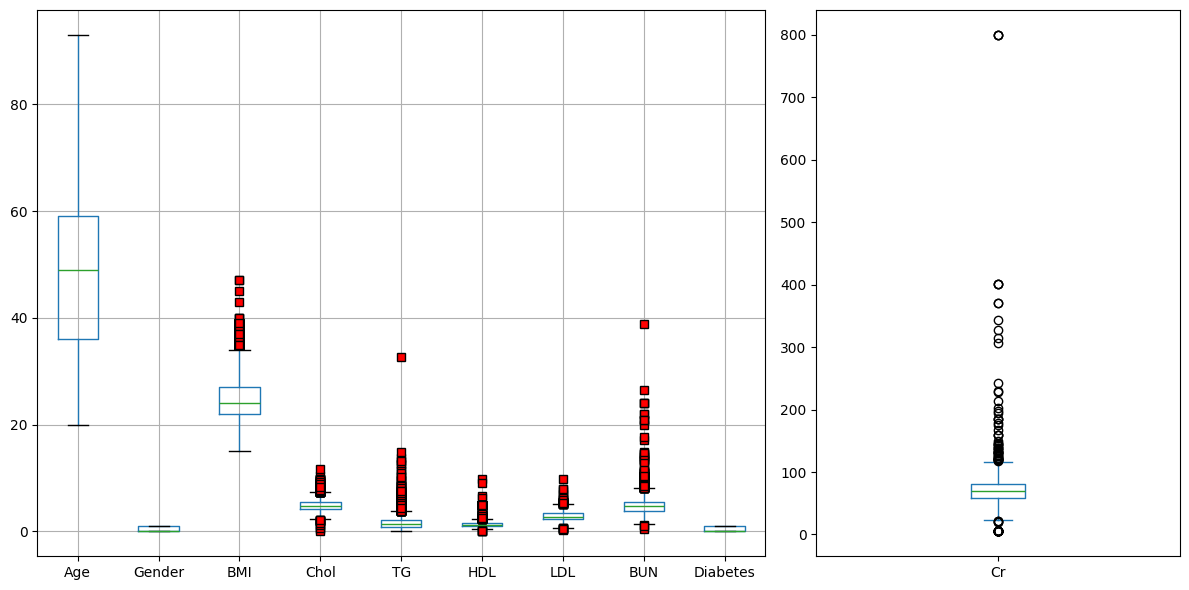

In [14]:
fig, axs = plt.subplots(1,2, figsize=(12,6), gridspec_kw={'width_ratios':[2,1]})

df[df.columns[df.columns != 'Cr']].boxplot(ax=axs[0],flierprops=dict (marker='s', markerfacecolor='red'))
df['Cr'].plot(kind='box', ax=axs[1])

plt.tight_layout()
plt.show()

In [15]:
df =df.drop_duplicates()

In [16]:
df.shape

(5131, 10)

In [17]:
df = df.dropna()

In [18]:
df.shape

(5131, 10)

In [19]:
df['BUN'] = df['BUN'].clip(upper=25)

In [20]:
df['TG'] = df['TG'].clip(upper=18)

In [21]:
df['Chol'] = df['Chol'].clip(upper=15)

In [22]:
df['HDL'] = df['HDL'].clip(upper=15)

In [23]:
df['LDL'] = df['LDL'].clip(upper=10)

In [24]:
df['BMI'] = df['BMI'].clip(upper=45)

In [25]:
df['Cr'] = df['Cr'].clip(upper=250, lower=25)

In [26]:
df.shape

(5131, 10)

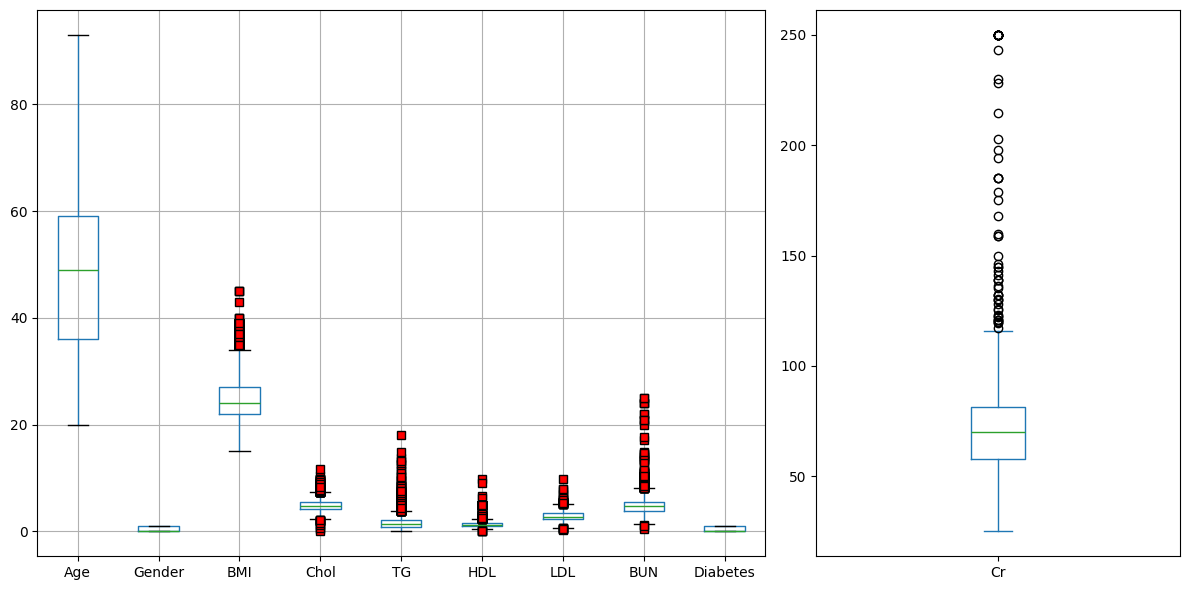

In [27]:
fig, axs = plt.subplots(1,2, figsize=(12,6), gridspec_kw={'width_ratios':[2,1]})

df[df.columns[df.columns != 'Cr']].boxplot(ax=axs[0],flierprops=dict (marker='s', markerfacecolor='red'))
df['Cr'].plot(kind='box', ax=axs[1])

plt.tight_layout()
plt.show()

In [28]:
matriz_correlacion = df.corr()

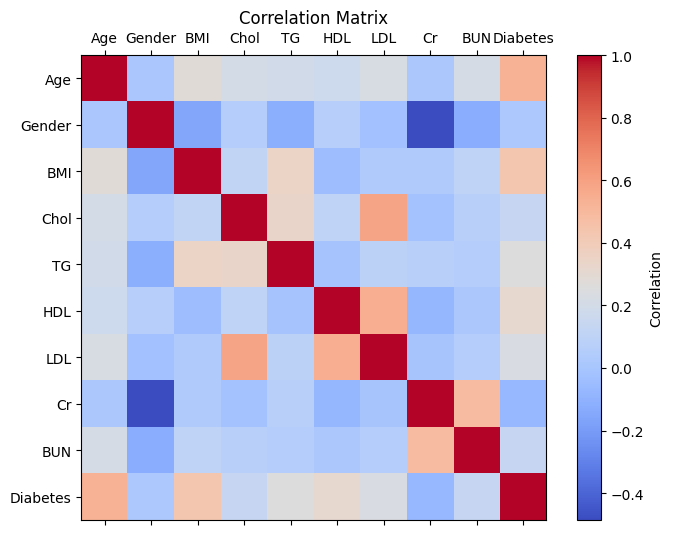

In [29]:
plt.figure(figsize=(8, 6))
plt.matshow(matriz_correlacion, cmap='coolwarm', fignum=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns)
plt.yticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns)
plt.title('Correlation Matrix')
plt.show()

In [30]:
# Reviso por valores no numericos.
df.count().isna()

Age         False
Gender      False
BMI         False
Chol        False
TG          False
HDL         False
LDL         False
Cr          False
BUN         False
Diabetes    False
dtype: bool

### Ajuste por correlacion de la columna objetivo.

In [31]:
corMatriz = df.corr()

In [33]:
# Correlaciones mayores a 0.1
cor_target = abs(corMatriz["Diabetes"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

Age         0.524555
BMI         0.427450
Chol        0.131063
TG          0.253415
HDL         0.309625
LDL         0.230566
BUN         0.134445
Diabetes    1.000000
Name: Diabetes, dtype: float64

In [34]:
#Correlaciones menores a 0.1 y qu eclasifican como irrelevantes
cor_target = abs(corMatriz["Diabetes"])
irrelevant_features = cor_target[cor_target<=0.1]
irrelevant_features

Gender    0.024143
Cr        0.073583
Name: Diabetes, dtype: float64

In [35]:
#Borro las columnas que tiene una correlacion menor a 0.1 del df.
df_filtrado = df.drop(columns=irrelevant_features.index)

In [40]:
dff =df_filtrado.corr()

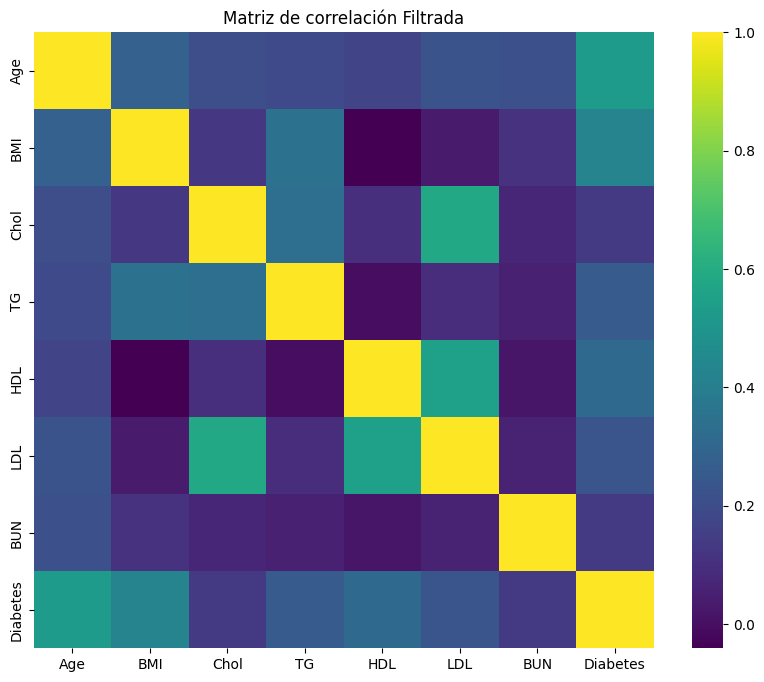

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(dff, annot=False, cmap='viridis', fmt=".2f")

plt.title('Matriz de correlación Filtrada')

plt.show()

### Exporto el modelo


In [43]:
#Exporto el dataframe como parquet 

dff.to_parquet(r'dataset/diabetes_ok.parquet', index=False)